In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [149]:
df_titanic = pd.read_csv ('train.csv')
df_titanic.head (10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


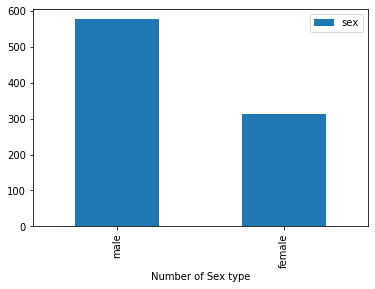

In [155]:
df_titanic.Sex.value_counts()
sex = df_titanic.Sex.value_counts().reset_index(name='sex')
sex = sex.rename(columns={'index':'Number of Sex type'})
sex.plot.bar(x='Number of Sex type', y='sex')

### Male or Female, who mostly survived?

In [195]:
sex_survived = df_titanic.groupby(['Survived', 'Sex'])['PassengerId']\
.nunique().reset_index(name = 'unique_passenger')
sex_survived

,Survived,Sex,unique_passenger
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


### from where Emabarked mostly survived?

In [175]:
embarked_survived = df_titanic.groupby(['Survived', 'Embarked'])['PassengerId']\
.nunique().reset_index(name = 'unique_passenger')
embarked_survived


,Survived,Embarked,unique_passenger
0,0,C,75
1,0,Q,47
2,0,S,427
3,1,C,93
4,1,Q,30
5,1,S,217


In [265]:
passenger = df_titanic['PassengerId']
survived = df_titanic['Survived']
Pclass = df_titanic['Pclass']
Age = df_titanic['Age']
SibSp = df_titanic['SibSp']
Parch = df_titanic['Parch']

df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


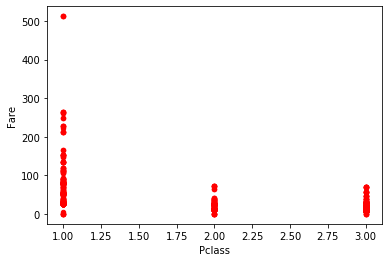

In [189]:
df_titanic.plot.scatter(x = 'Pclass', y='Fare' , color ='Red')

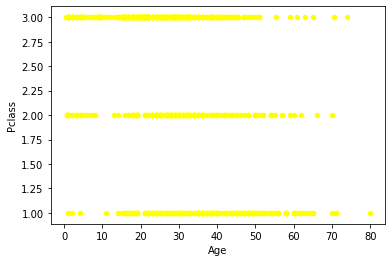

In [193]:
df_titanic.plot.scatter(x = 'Age', y='Pclass' , color ='Yellow')

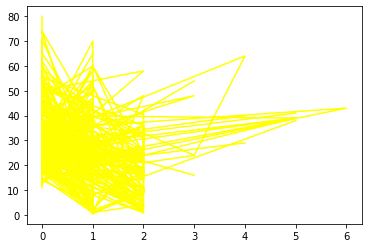

In [266]:
plt.plot(Parch, Age, color ='Yellow')

In [270]:
Parch_df = df_titanic.groupby(['Parch', 'Sex'])['PassengerId']\
.nunique().reset_index(name = 'unique_passenger')
Parch_df

,Parch,Sex,unique_passenger
0,0,female,194
1,0,male,484
2,1,female,60
3,1,male,58
4,2,female,49
5,2,male,31
6,3,female,4
7,3,male,1
8,4,female,2
9,4,male,2


In [271]:
Sibs_df = df_titanic.groupby(['SibSp', 'Sex'])['PassengerId']\
.nunique().reset_index(name = 'unique_passenger')
Sibs_df

,SibSp,Sex,unique_passenger
0,0,female,174
1,0,male,434
2,1,female,106
3,1,male,103
4,2,female,13
5,2,male,15
6,3,female,11
7,3,male,5
8,4,female,6
9,4,male,12


Text(0, 0.5, 'Uniq passenger')

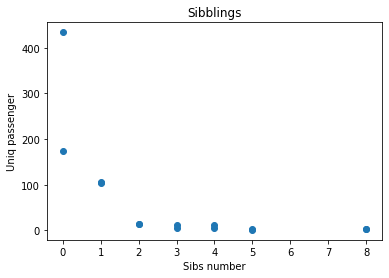

In [278]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(Sibs_df['SibSp'], Sibs_df['unique_passenger'])
# set a title and labels
ax.set_title('Sibblings')
ax.set_xlabel('Sibs number')
ax.set_ylabel('Uniq passenger')

Text(0, 0.5, 'Uniq passenger')

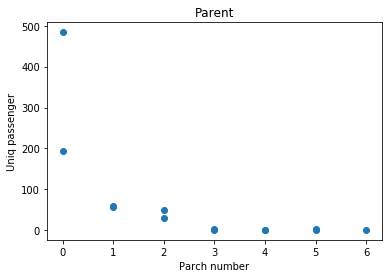

In [280]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(Parch_df['Parch'], Parch_df['unique_passenger'])
# set a title and labels
ax.set_title('Parent')
ax.set_xlabel('Parch number')
ax.set_ylabel('Uniq passenger')